Cài thư viện

In [58]:
#!pip install nltk wordcloud scikit-learn matplotlib seaborn


Import thư viện

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import io

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon') # Download the vader_lexicon
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
from nltk.probability import FreqDist

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Mount Google Drive (Colab)

In [60]:
from google.colab import files
uploaded = files.upload()


Saving IMDB Dataset.csv to IMDB Dataset.csv


Load dataset

In [61]:
df = pd.read_csv(io.BytesIO(uploaded['IMDB Dataset.csv']))  # Đổi đúng tên file CSV
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Kiểm tra dataset

In [62]:
df.info()
df["sentiment"].value_counts()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


,0
review,0
sentiment,0


Biểu đồ ban đầu

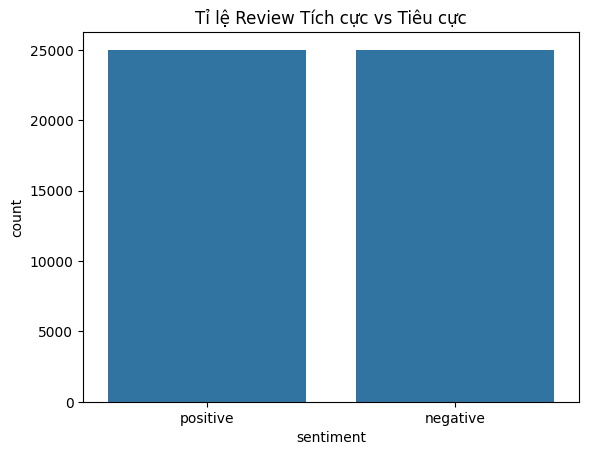

In [63]:
sns.countplot(x=df["sentiment"])
plt.title("Tỉ lệ Review Tích cực vs Tiêu cực")
plt.show()


Clean text

In [64]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', ' ', text)        # Xóa HTML
    text = re.sub(r'[^a-zA-Z]', ' ', text)    # Giữ lại chữ
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [65]:
df_clean = df.copy()
df_clean["clean_review"] = df_clean["review"].apply(clean_text)
df_clean["sentiment"] = df_clean["sentiment"].map({"positive": 1, "negative": 0}) # Convert sentiment to numerical
df_clean.head()

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,1,one reviewer mentioned watching oz episode hoo...
1,A wonderful little production. <br /><br />The...,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visually stunnin...


Giữ lại TÍNH TỪ (Adjectives)

In [66]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng') # Download the specific English tagger
nltk.download('punkt_tab')

def keep_only_adjectives(text):
    words = nltk.word_tokenize(text)
    tagged = nltk.pos_tag(words)
    return " ".join([word for word, pos in tagged if pos.startswith('JJ')])

df_clean["review_adj"] = df_clean["clean_review"].apply(keep_only_adjectives)
df_clean.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,review,sentiment,clean_review,review_adj
0,One of the other reviewers has mentioned that ...,1,one reviewer mentioned watching oz episode hoo...,oz first oz timid pull punch regard classic os...
1,A wonderful little production. <br /><br />The...,1,wonderful little production filming technique ...,wonderful little old bbc entire polari seamles...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...,wonderful spend hot light simplistic witty lik...
3,Basically there's a family where a little boy ...,0,basically family little boy jake think zombie ...,little boy slower rambo kill watchable real ru...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visually stunnin...,love stunning u vivid human u different presen...


WordCloud

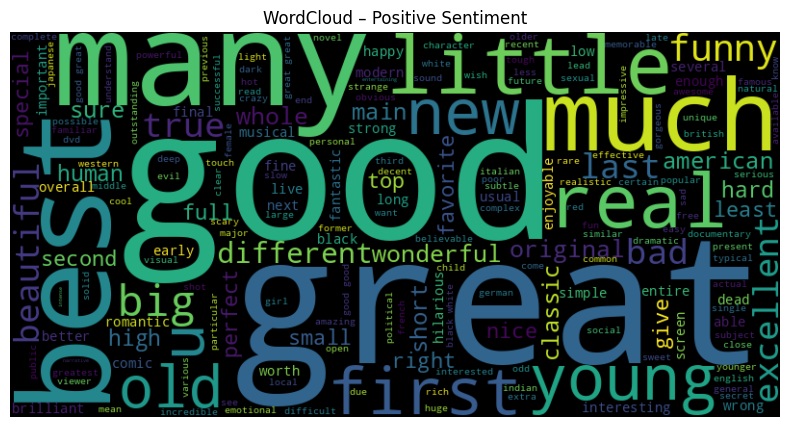

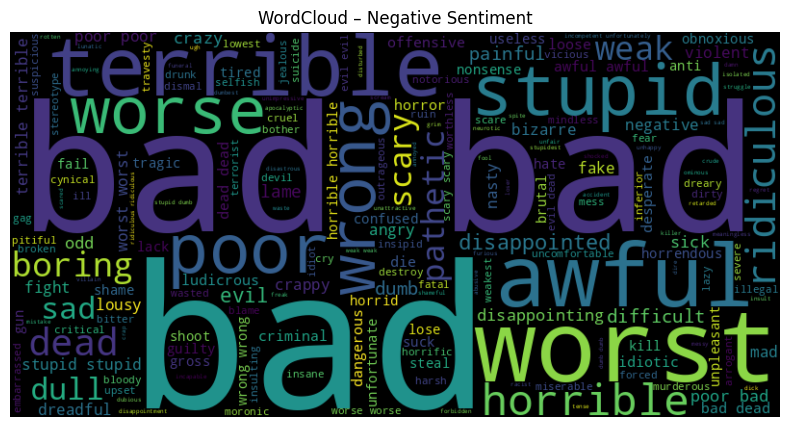

In [67]:
# Define positive_text and negative_text
positive_text = " ".join(df_clean[df_clean["sentiment"] == 1]["review_adj"])
negative_text = " ".join(df_clean[df_clean["sentiment"] == 0]["review_adj"])

# 3. WORDCLOUD POSITIVE
wordcloud_pos = WordCloud(width=800, height=400, background_color='black').generate(positive_text)

plt.figure(figsize=(10,5))
plt.title("WordCloud – Positive Sentiment")
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

# 4. WORDCLOUD NEGATIVE (CHỈ GIỮ TỪ CÓ CẢM XÚC TIÊU CỰC)
sia = SentimentIntensityAnalyzer()

def extract_negative_words(text):
    words = nltk.word_tokenize(text)
    return " ".join([word for word in words if sia.polarity_scores(word)['compound'] < -0.3])

negative_text_filtered = extract_negative_words(negative_text)

wordcloud_neg2 = WordCloud(width=800, height=400, background_color='black').generate(negative_text_filtered)

plt.figure(figsize=(10, 5))
plt.title("WordCloud – Negative Sentiment")
plt.imshow(wordcloud_neg2, interpolation='bilinear')
plt.axis("off")
plt.show()

Phân tích tần suất từ (Positive/Negative adjectives)

/tmp/ipython-input-277693703.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=pos_df, x="freq", y="word", palette="Greens_r", legend=False)
/tmp/ipython-input-277693703.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=neg_df, x="freq", y="word", palette="Reds_r", legend=False)


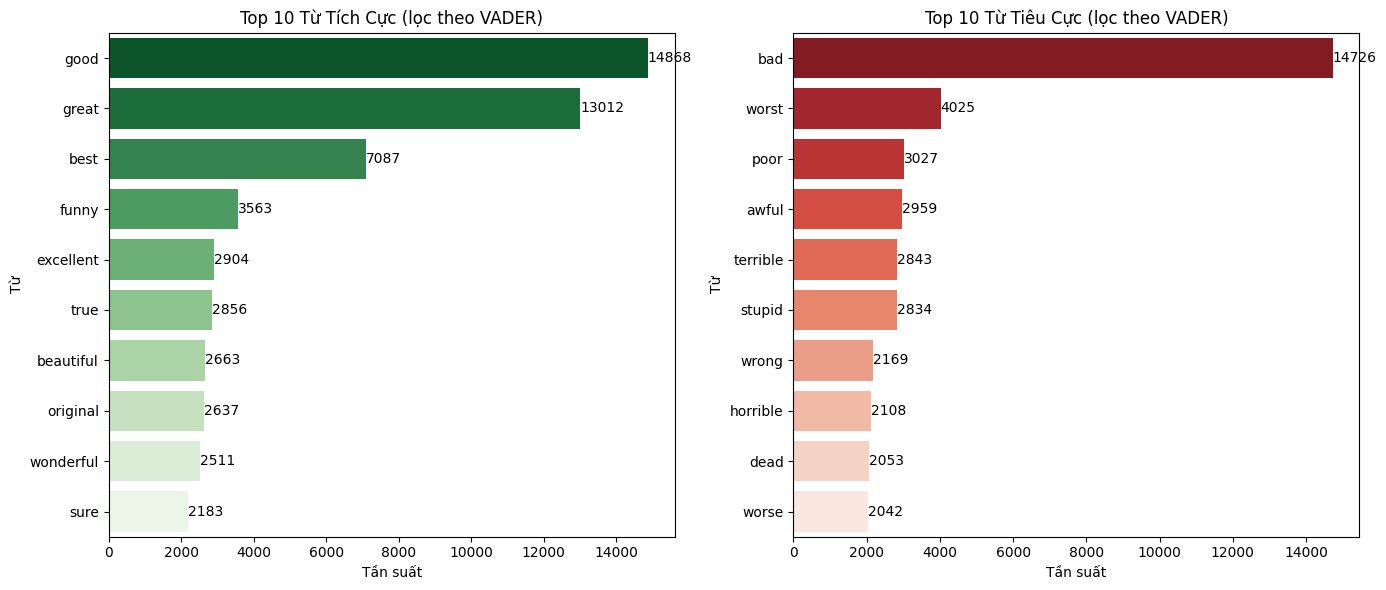

In [68]:
# --- 1. Lấy tất cả tính từ từ positive_text và negative_text ---
all_positive_adjectives = positive_text.split()
all_negative_adjectives = negative_text.split()

# Tạo tần suất từ
pos_words_freq = FreqDist(all_positive_adjectives)
neg_words_freq = FreqDist(all_negative_adjectives)

# --- 2. Lọc từ tích cực và tiêu cực bằng VADER ---
pos_true = [w for w in pos_words_freq.keys() if sia.polarity_scores(w)['compound'] > 0.3]
neg_true = [w for w in neg_words_freq.keys() if sia.polarity_scores(w)['compound'] < -0.3]

# --- 3. Top 10 từ tích cực ---
pos_sorted = sorted([(word, pos_words_freq[word]) for word in pos_true],
                    key=lambda x: x[1], reverse=True)[:10]
pos_df = pd.DataFrame(pos_sorted, columns=["word", "freq"])

# --- 4. Top 10 từ tiêu cực ---
neg_sorted = sorted([(word, neg_words_freq[word]) for word in neg_true],
                    key=lambda x: x[1], reverse=True)[:10]
neg_df = pd.DataFrame(neg_sorted, columns=["word", "freq"])

# --- 5. VẼ 2 BIỂU ĐỒ CÙNG 1 CELL ---
plt.figure(figsize=(14,6))

# Biểu đồ tích cực
plt.subplot(1,2,1)
ax1 = sns.barplot(data=pos_df, x="freq", y="word", palette="Greens_r", legend=False)
plt.title("Top 10 Từ Tích Cực (lọc theo VADER)")
plt.xlabel("Tần suất")
plt.ylabel("Từ")

# Thêm số lên từng thanh
for i, v in enumerate(pos_df["freq"]):
    ax1.text(v + 0.01, i, str(v), color='black', va='center')

# Biểu đồ tiêu cực
plt.subplot(1,2,2)
ax2 = sns.barplot(data=neg_df, x="freq", y="word", palette="Reds_r", legend=False)
plt.title("Top 10 Từ Tiêu Cực (lọc theo VADER)")
plt.xlabel("Tần suất")
plt.ylabel("Từ")

# Thêm số lên từng thanh
for i, v in enumerate(neg_df["freq"]):
    ax2.text(v + 0.01, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()

Phân tích độ dài review

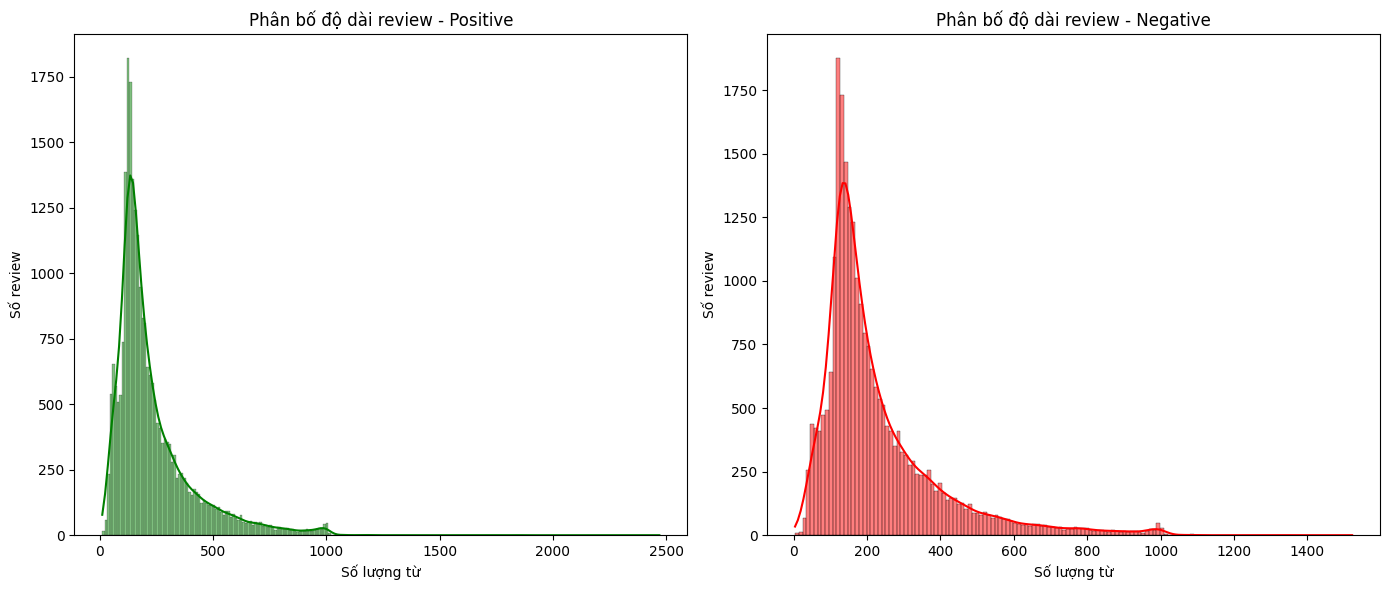

In [81]:
df_clean['review_length'] = df_clean['review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(14,6))

# --- Biểu đồ Positive ---
plt.subplot(1,2,1)
sns.histplot(
    data=df_clean[df_clean["sentiment"]==1],
    x='review_length',
    kde=True,
    color='green'
    # bins=None  # Removed this line to allow seaborn to choose bins automatically
)
plt.title('Phân bố độ dài review - Positive')
plt.xlabel("Số lượng từ")
plt.ylabel("Số review")

# --- Biểu đồ Negative ---
plt.subplot(1,2,2)
sns.histplot(
    data=df_clean[df_clean["sentiment"]==0],
    x='review_length',
    kde=True,
    color='red'
    # bins=None  # Removed this line to allow seaborn to choose bins automatically
)
plt.title('Phân bố độ dài review - Negative')
plt.xlabel("Số lượng từ")
plt.ylabel("Số review")
plt.tight_layout()
plt.show()

PHÂN TÍCH THEO MỨC ĐỘ

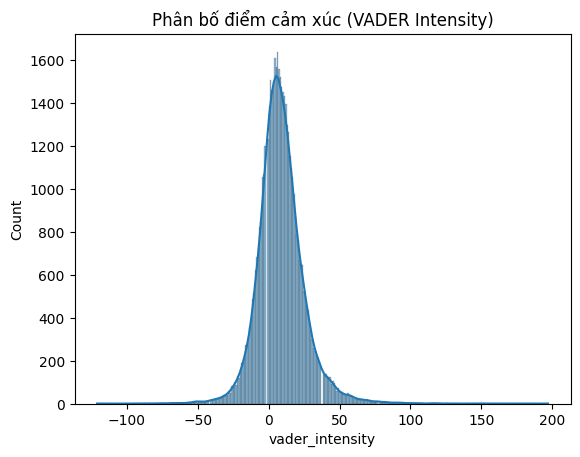

In [70]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def vader_intensity(text):
    words = nltk.word_tokenize(text)

    total_score = 0
    for w in words:
        comp = sia.polarity_scores(w)['compound']

        # Áp lực chuyển compound (-1 → +1) thành hệ số mạnh/yếu
        # |compound| > 0.6  → mạnh (x3)
        # |compound| > 0.3  → trung bình (x2)
        # |compound| > 0.1  → nhẹ (x1)
        if comp > 0.6:
            total_score += 3
        elif comp > 0.3:
            total_score += 2
        elif comp > 0.1:
            total_score += 1
        elif comp < -0.6:
            total_score -= 3
        elif comp < -0.3:
            total_score -= 2
        elif comp < -0.1:
            total_score -= 1

    return total_score

df_clean["vader_intensity"] = df_clean["clean_review"].apply(vader_intensity)
df_clean[["clean_review", "vader_intensity"]].head()
sns.histplot(df_clean["vader_intensity"], kde=True)
plt.title("Phân bố điểm cảm xúc (VADER Intensity)")
plt.show()


BIỂU ĐỒ TỪ GẮN CẢM XÚC

In [71]:
emotion_lexicon = {
    'joy': ['amazing','wonderful','great','excellent','good'],
    'anger': ['bad','terrible','awful','hate'],
    'boredom': ['boring','slow','dull']
}
emotion_counts = {}
for emo, words in emotion_lexicon.items():
    emotion_counts[emo] = sum(df_clean['clean_review'].str.contains('|'.join(words)))
emotion_counts


{'joy': 30430, 'anger': 17549, 'boredom': 6636}

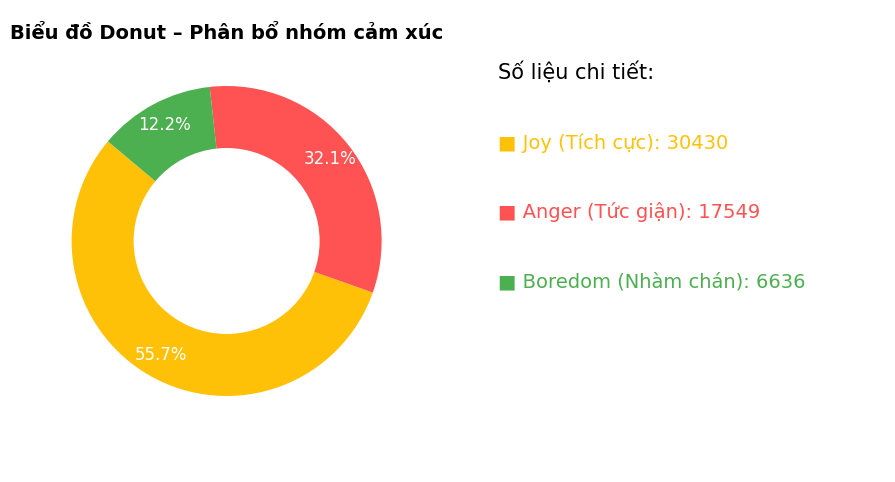

In [72]:
# DONUT CHART + MÀU CHÚ THÍCH CHO SỐ LIỆU
import matplotlib.pyplot as plt
labels = list(emotion_counts.keys())
sizes = list(emotion_counts.values())
colors = ['#FFC107', '#FF5252', '#4CAF50']  # xanh - đỏ - vàng
plt.figure(figsize=(11,6))

# ==== Donut Chart ====
plt.subplot(1,2,1)
wedges, texts, autotexts = plt.pie(
    sizes,
    autopct='%1.1f%%',
    pctdistance=0.85,
    colors=colors,
    textprops={'color':'white', 'fontsize':12},
    startangle=140
)

# Tạo lỗ rỗng donut
centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Biểu đồ Donut – Phân bổ nhóm cảm xúc", fontsize=14, fontweight='bold')
# ==== Bảng số liệu có màu chú thích ====
plt.subplot(1,2,2)
plt.axis('off')

# Tạo custom legend text
info_text = (
    f"{chr(9632)} Joy (Tích cực): {emotion_counts['joy']}\n\n"
    f"{chr(9632)} Anger (Tức giận): {emotion_counts['anger']}\n\n"
    f"{chr(9632)} Boredom (Nhàm chán): {emotion_counts['boredom']}"
)

# In ra text, nhưng cần tô màu theo từng dòng → in từng dòng riêng
y_start = 0.7
spacing = 0.15

plt.text(0.0, 0.85, "Số liệu chi tiết:", fontsize=15)

# Joy
plt.text(0.0, y_start, f"{chr(9632)} Joy (Tích cực): {emotion_counts['joy']}",
         fontsize=14, color=colors[0])
# Anger
plt.text(0.0, y_start - spacing, f"{chr(9632)} Anger (Tức giận): {emotion_counts['anger']}",
         fontsize=14, color=colors[1])
# Boredom
plt.text(0.0, y_start - 2*spacing, f"{chr(9632)} Boredom (Nhàm chán): {emotion_counts['boredom']}",
         fontsize=14, color=colors[2])

plt.show()
